<H1/>EXPLORING DATA <H/>

In [2]:
#libraries
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import skew

In [3]:
#importing the dataset by reading the excel file
df1 = pd.read_excel(r"C:\Users\girir\OneDrive - University of Salford\assignment asdv\Scenario 2 - Economic Outlook\Country Groupings.xlsx")
print(df1.head())

  Code         Economy                      Region         Income group
0  AFG     Afghanistan                  South Asia           Low income
1  ALB         Albania       Europe & Central Asia  Upper middle income
2  DZA         Algeria  Middle East & North Africa  Upper middle income
3  ASM  American Samoa         East Asia & Pacific          High income
4  AND         Andorra       Europe & Central Asia          High income


In [4]:
#importing the dataset by reading the excel file
df2 = pd.read_excel(r"C:\Users\girir\OneDrive - University of Salford\assignment asdv\Scenario 2 - Economic Outlook\Data.xlsx")
print(df2.head())

   WEO Country Code  ISO        Country  Year  \
0               111  USA  United States  2001   
1               111  USA  United States  2002   
2               111  USA  United States  2003   
3               111  USA  United States  2004   
4               111  USA  United States  2005   

   Gross domestic product, constant prices,National currency  \
0                                          13263.425           
1                                          13488.350           
2                                          13865.525           
3                                          14399.675           
4                                          14901.250           

   Gross domestic product, constant prices,Percent change  \
0                                              0.954        
1                                              1.696        
2                                              2.796        
3                                              3.852        
4              

In [5]:
#creating copy of data frame
df2_OG = df2.copy()

In [6]:
#creating copy of data frame
df1_OG = df1.copy()

In [7]:
#reading dataset
df1.tail()

,Code,Economy,Region,Income group
213,VIR,Virgin Islands (U.S.),Latin America & Caribbean,High income
214,PSE,West Bank and Gaza,Middle East & North Africa,Lower middle income
215,YEM,"Yemen, Rep.",Middle East & North Africa,Low income
216,ZMB,Zambia,Sub-Saharan Africa,Lower middle income
217,ZWE,Zimbabwe,Sub-Saharan Africa,Lower middle income


In [8]:
#reading dataset
df2_OG.tail()

,WEO Country Code,ISO,Country,Year,"Gross domestic product, constant prices,National currency","Gross domestic product, constant prices,Percent change","Gross domestic product, current prices,National currency","Gross domestic product, current prices,U.S. dollars","Gross domestic product, current prices,Purchasing power parity; international dollars","Gross domestic product, deflator,Index",...,"Gross domestic product corresponding to fiscal year, current prices,National currency","Current account balance,U.S. dollars","Current account balance,Percent of GDP","Unemployment rate,Percent of total labor force","General government net debt,National currency","General government net debt,Percent of GDP","Employment,Persons","General government structural balance,National currency","General government structural balance,Percent of potential GDP","Output gap in percent of potential GDP,Percent of potential GDP"
3888,968,ROU,Romania,2016,732.874,2.853,752.116,185.334,470.932,102.626,...,752.116,-2.980,-1.608,7.200,201.238,26.756,NaN,-9.151,-1.174,NaN
3889,968,ROU,Romania,2017,793.062,8.213,851.620,210.529,530.795,107.384,...,851.620,-6.574,-3.122,6.092,220.245,25.862,NaN,-26.808,-3.172,NaN
3890,968,ROU,Romania,2018,840.884,6.030,959.059,243.498,576.333,114.054,...,959.059,-11.218,-4.607,5.250,251.691,26.244,NaN,-35.958,-3.872,NaN
3891,968,ROU,Romania,2019,873.210,3.844,1063.795,250.993,609.223,121.826,...,1063.795,-12.207,-4.863,4.892,303.987,28.576,NaN,-53.586,-5.208,NaN
3892,968,ROU,Romania,2020,840.972,-3.692,1066.781,251.699,594.388,126.851,...,1066.781,-12.438,-4.941,6.075,426.730,40.002,NaN,-51.093,-4.614,NaN


In [9]:
# Function to check data types on df1 nad df2_OG
def check_data_types(df1):
    print("Data Types of Each Column df1:")
    print("-" * 30)
    print(df1.dtypes)
    print("-" * 30)
    print(f"Total number of columns: {len(df1.columns)}")
    print(f"Total number of rows: {len(df1)}")

# Call the function with df1
check_data_types(df1)
def check_data_types(df2_OG):
    print("Data Types of Each Column df2:")
    print("-" * 30)
    print(df2_OG.dtypes)
    print("-" * 30)
    print(f"Total number of columns: {len(df2_OG.columns)}")
    print(f"Total number of rows: {len(df2_OG)}")

# Call the function with df2_OG
check_data_types(df2_OG)

Data Types of Each Column df1:
------------------------------
Code            object
Economy         object
Region          object
Income group    object
dtype: object
------------------------------
Total number of columns: 4
Total number of rows: 218
Data Types of Each Column df2:
------------------------------
WEO Country Code                                                                                           int64
ISO                                                                                                       object
Country                                                                                                   object
Year                                                                                                       int64
Gross domestic product, constant prices,National currency                                                float64
Gross domestic product, constant prices,Percent change                                                   float64
Gross do

<H1/>DATA ANALYSIS AND CLEANING<H/>

In [11]:
# Function to remove white spaces from object columns in any DataFrame
def remove_whitespace(df):
    # Iterate over each column in the DataFrame that has object data type
    for col in df.select_dtypes(include=['object']).columns:
        # Remove leading and trailing whitespace
        df[col] = df[col].str.strip()
remove_whitespace(df1)
remove_whitespace(df2_OG)

In [12]:
#checking null with boolean on df1
df1.isna().any()

Code            False
Economy         False
Region          False
Income group     True
dtype: bool

In [13]:
#checking null with boolean on df2_OG
df2_OG.isna().any()

WEO Country Code                                                                                         False
ISO                                                                                                      False
Country                                                                                                  False
Year                                                                                                     False
Gross domestic product, constant prices,National currency                                                 True
Gross domestic product, constant prices,Percent change                                                    True
Gross domestic product, current prices,National currency                                                  True
Gross domestic product, current prices,U.S. dollars                                                       True
Gross domestic product, current prices,Purchasing power parity; international dollars                     True
G

In [14]:
# sum and Percentage of missing data values in each column on df1 
def missing_data_summary(df1):
    print("\nMissing Data Summary:")
    print("-" * 50)
    missing_summary = df1.isnull().sum()
    missing_percent = (df1.isnull().sum() / len(df1)) * 100
    missing_df = pd.DataFrame({
        'Missing Count': missing_summary,
        'Missing Percentage': missing_percent.round(2)
    })
    return missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Percentage', ascending=False)
print(missing_data_summary(df1))
total_nulls = df1.isna().sum().sum()
print(f"Total number of null values in the dataset: {total_nulls}")
#Total duplicate values in the dataset df1
total_duplicate = df1.duplicated().sum()
print(f"Total duplicate values in the dataset: {total_duplicate}")


Missing Data Summary:
--------------------------------------------------
              Missing Count  Missing Percentage
Income group              1                0.46
Total number of null values in the dataset: 1
Total duplicate values in the dataset: 0


In [15]:
# sum and Percentage of missing data values in each column on df2_OG
def missing_data_summary(df2_OG):
    print("\nMissing Data Summary:")
    print("-" * 50)
    missing_summary = df2_OG.isnull().sum()
    missing_percent = (df2_OG.isnull().sum() / len(df2_OG)) * 100
    missing_df = pd.DataFrame({
        'Missing Count': missing_summary,
        'Missing Percentage': missing_percent.round(2)
    })
    return missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Percentage', ascending=False)

print(missing_data_summary(df2_OG))
total_nulls = df2_OG.isna().sum().sum()
print(f"Total number of null values in the dataset: {total_nulls}")
#Total duplicate values in the dataset df2_OG
total_duplicate = df2_OG.duplicated().sum()
print(f"Total duplicate values in the dataset: {total_duplicate}")


Missing Data Summary:
--------------------------------------------------
                                                    Missing Count  \
Output gap in percent of potential GDP,Percent ...           3354   
Employment,Persons                                           3102   
General government structural balance,Percent o...           2294   
General government structural balance,National ...           2205   
General government net debt,Percent of GDP                   2146   
General government net debt,National currency                2146   
Unemployment rate,Percent of total labor force               1674   
Gross national savings,Percent of GDP                         553   
Total investment,Percent of GDP                               505   
Volume of Imports of goods,Percent change                     429   
Volume of imports of goods and services,Percent...            429   
Volume of exports of goods,Percent change                     429   
Volume of exports of goods an

<H1/>OUTLIERS<H/>

In [17]:
# Function to handle outliers using IQR method for df2
def handle_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower_bound, upper_bound)

In [18]:
# Handle outliers for numeric columns on df2
numeric_columns = df2.select_dtypes(include=[np.number]).columns
for column in numeric_columns:
    df2[column] = handle_outliers(df2[column])

In [19]:
# Function to calculate the percentage of missing values and grouping ISO on df2
def missing_percentage(x):
    return (x.isnull().sum() / len(x)) * 100
missing_percentages = df2.groupby('ISO').agg(lambda x: missing_percentage(x))
print("Missing percentages by ISO (first 5 columns):")
print(missing_percentages.iloc[:, :5])


Missing percentages by ISO (first 5 columns):
     WEO Country Code  Country  Year  \
ISO                                    
ABW               0.0      0.0   0.0   
AFG               0.0      0.0   0.0   
AGO               0.0      0.0   0.0   
ALB               0.0      0.0   0.0   
AND               0.0      0.0   0.0   
..                ...      ...   ...   
WSM               0.0      0.0   0.0   
YEM               0.0      0.0   0.0   
ZAF               0.0      0.0   0.0   
ZMB               0.0      0.0   0.0   
ZWE               0.0      0.0   0.0   

     Gross domestic product, constant prices,National currency  \
ISO                                                              
ABW                                                0.0           
AFG                                                5.0           
AGO                                                0.0           
ALB                                                0.0           
AND                                  

<H1/>SKEW<H/>

In [21]:
#managing skew
def transform_economic_data(df):
    # Get numeric columns
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    
    print("\nTransformation Summary:")
    print("-" * 50)
    
    # Initialize dictionaries to store transformed data
    transformed_columns = {}
    transformation_info = {}
    
    for col in numeric_columns:
        # Handle infinite values and NaN
        data = df[col].replace([np.inf, -np.inf], np.nan).dropna()
        original_skew = data.skew()
        
        # Choose transformation based on data characteristics
        if data.min() < 0:
            # For negative values, use shift and log
            shift = abs(data.min()) + 1
            transformed_data = np.log1p(data + shift)
            transform_type = f"Shift-Log (shift: {shift:.2f})"
        else:
            # For non-negative values, use log transformation
            transformed_data = np.log1p(data)
            transform_type = "Log"
        
        # Calculate new skewness
        new_skew = pd.Series(transformed_data).skew()
        
        # Store transformed data and information
        transformed_columns[f'{col}_transformed'] = transformed_data
        transformation_info[col] = {
            'transform_type': transform_type,
            'original_skew': original_skew,
            'new_skew': new_skew
        }
        
        # Print summary
        print(f"\nColumn: {col}")
        print(f"Transformation: {transform_type}")
        print(f"Original Skewness: {original_skew:.2f}")
        print(f"New Skewness: {new_skew:.2f}")
    
    # Combine original and transformed data efficiently
    result_df = pd.concat([df, pd.DataFrame(transformed_columns)], axis=1)
    
    # Show before/after comparison
    print("\nBefore vs After Transformation (First 5 rows):")
    comparison_cols = []
    for col in numeric_columns:
        comparison_cols.extend([col, f'{col}_transformed'])
    print(result_df[comparison_cols].head())
    
    return result_df

# Apply transformations
df2_OG = transform_economic_data(df2_OG)


Transformation Summary:
--------------------------------------------------

Column: WEO Country Code
Transformation: Log
Original Skewness: -0.06
New Skewness: -0.79

Column: Year
Transformation: Log
Original Skewness: -0.00
New Skewness: -0.01

Column: Gross domestic product, constant prices,National currency
Transformation: Log
Original Skewness: 10.20
New Skewness: 0.33

Column: Gross domestic product, constant prices,Percent change
Transformation: Shift-Log (shift: 55.24)
Original Skewness: 0.99
New Skewness: -9.48

Column: Gross domestic product, current prices,National currency
Transformation: Log
Original Skewness: 17.67
New Skewness: 0.29

Column: Gross domestic product, current prices,U.S. dollars
Transformation: Log
Original Skewness: 9.41
New Skewness: 0.44

Column: Gross domestic product, current prices,Purchasing power parity; international dollars
Transformation: Log
Original Skewness: 8.32
New Skewness: 0.13

Column: Gross domestic product, deflator,Index
Transformation

<H1/>DATA IMPUTATION<H/>

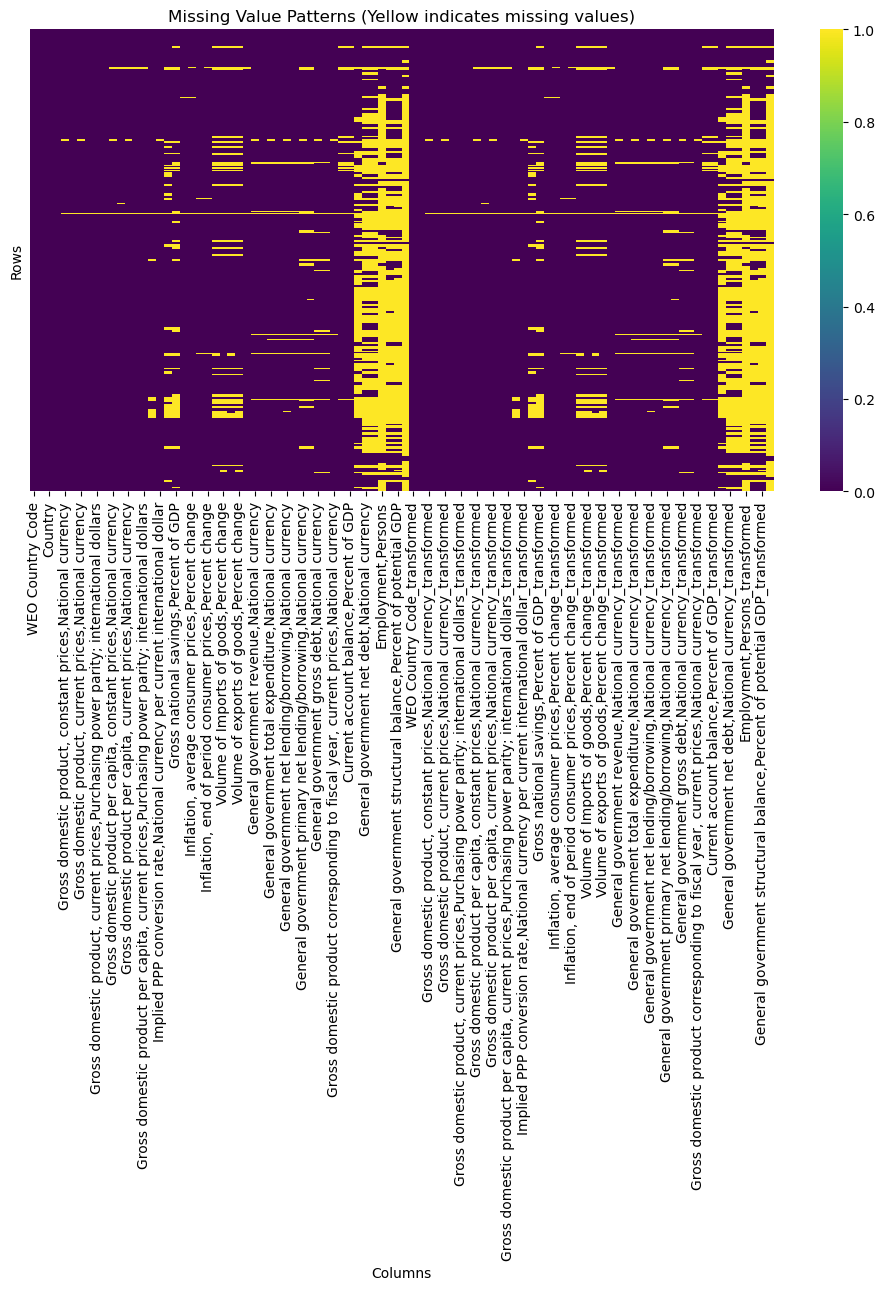

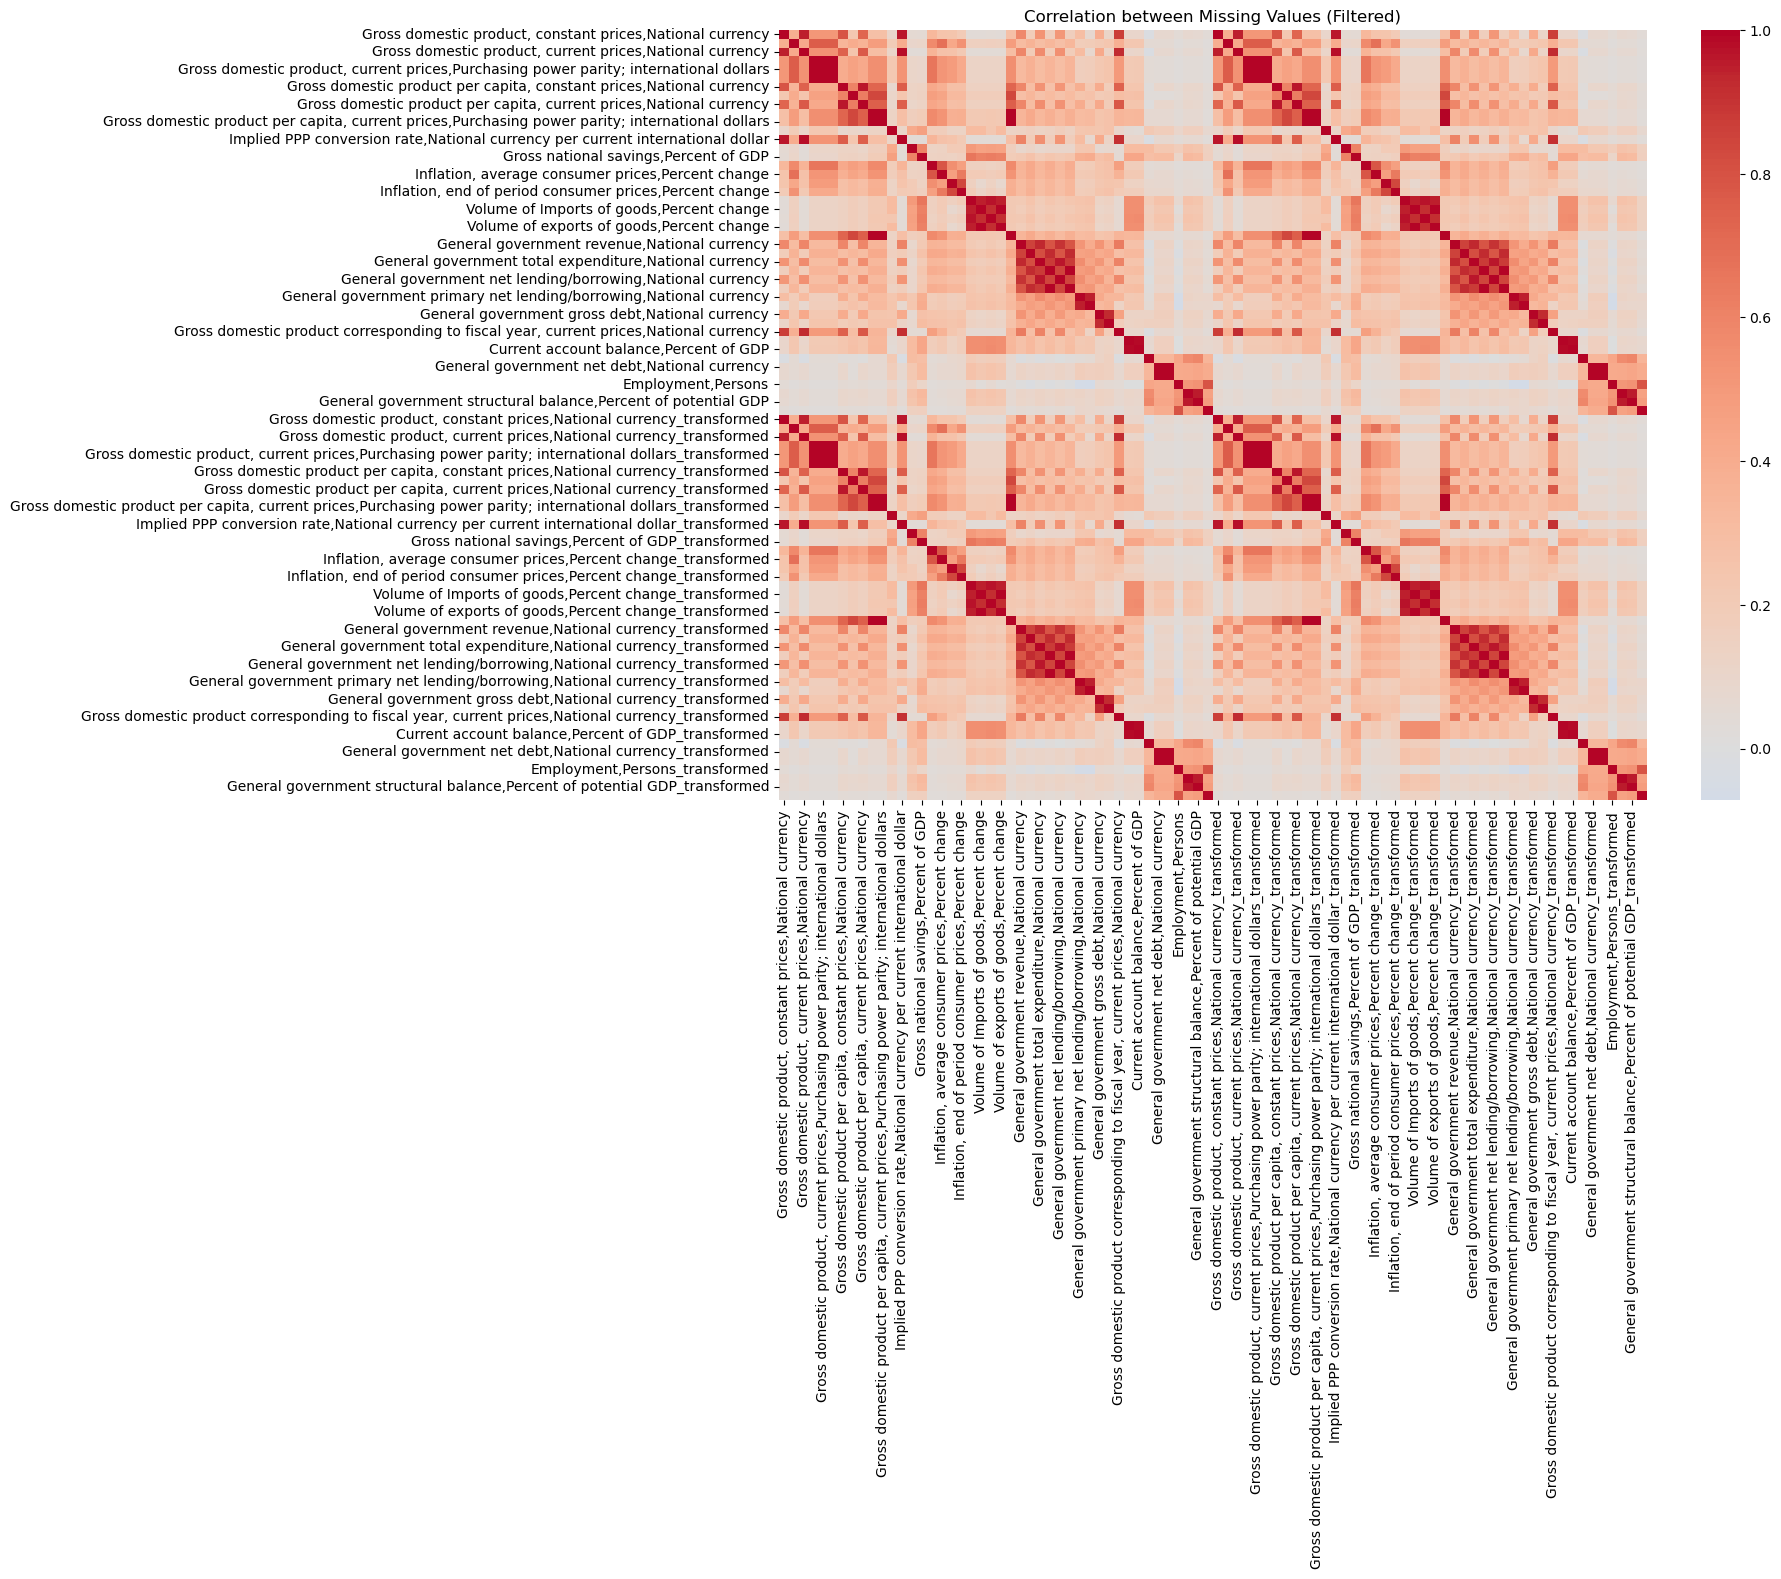

In [23]:
# Visualization of missing patterns on df2_OG
def plot_missing_patterns(df2_OG):
    # Heatmap to visualize missing patterns
    plt.figure(figsize=(12, 6))
    sns.heatmap(df2_OG.isnull(), yticklabels=False, cbar=True, cmap='viridis')
    plt.title('Missing Value Patterns (Yellow indicates missing values)')
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.show()

    # Correlation of missing values - only for columns with missing data
    missing_cols = df2_OG.columns[df2_OG.isnull().sum() > 0]
    plt.figure(figsize=(14, 10))  # Increase figure size to reduce clutter
    missing_corr = df2_OG[missing_cols].isnull().corr()

    # Heatmap of missing value correlations
    sns.heatmap(missing_corr, annot=False, cmap='coolwarm', center=0)
    
    # Rotate the x-tick labels for readability
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    
    plt.title('Correlation between Missing Values (Filtered)')
    plt.show()

# Call the updated function
plot_missing_patterns(df2_OG)

In [24]:
# Initialize imputers df2
knn_imputer = KNNImputer(n_neighbors=5)
iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(), max_iter=10, random_state=0)

# Impute numeric columns
for column in numeric_columns:
    if df2[column].isnull().sum() > 0:
        # Use KNN Imputer for columns with less than 5% missing values
        if missing_percentages[column].mean() < 5:
            df2[column] = knn_imputer.fit_transform(df2[[column]])
        else:
            # Use Iterative Imputer for columns with more than 5% missing values
            df2[column] = iterative_imputer.fit_transform(df2[[column]])
            
# Impute categorical columns
categorical_columns = df2.select_dtypes(include=['object']).columns
for column in categorical_columns:
    if df2[column].isnull().sum() > 0:
        df2[column].fillna(df2[column].mode()[0], inplace=True)

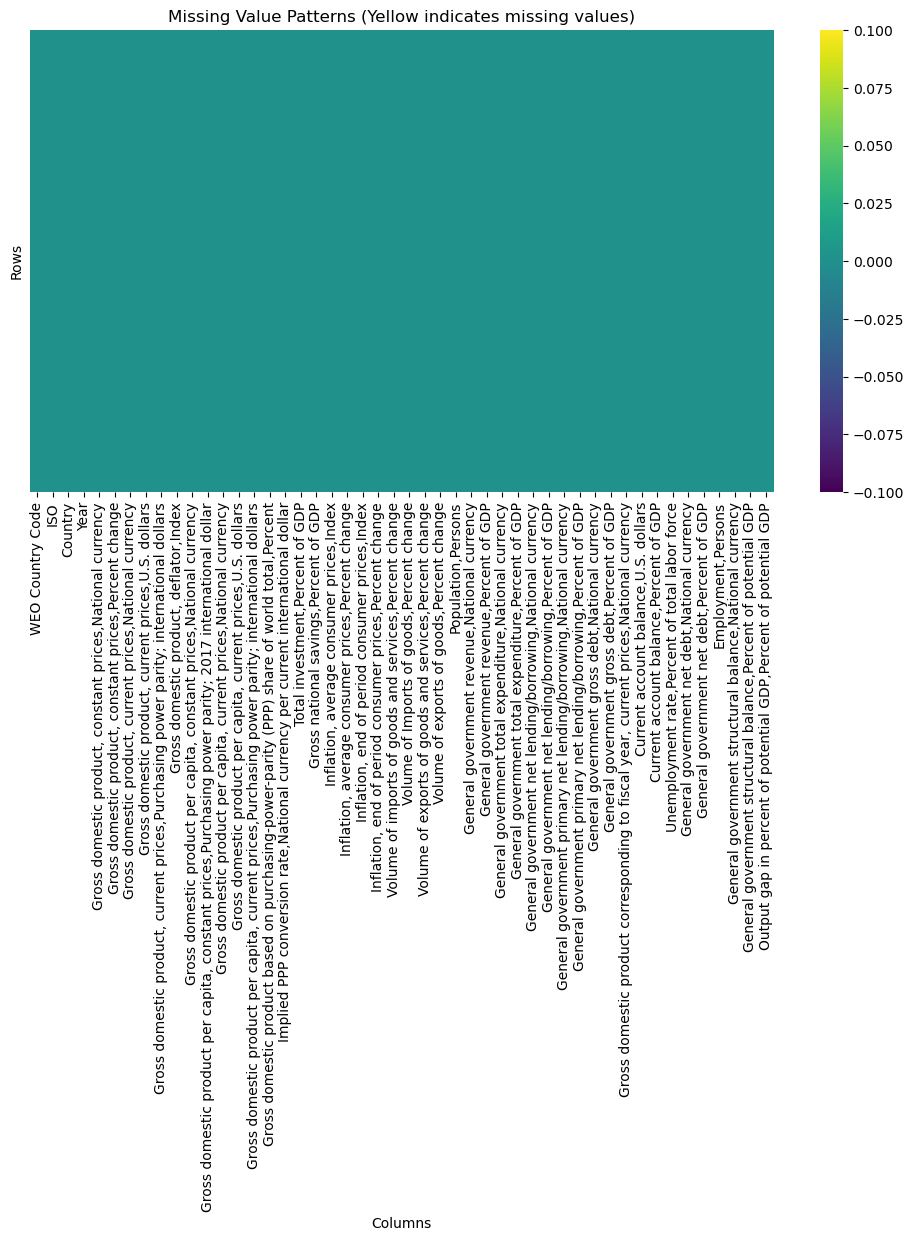

In [25]:
#after KNN and iterative imputer
import seaborn as sns
import matplotlib.pyplot as plt

# Visualization of missing patterns
def plot_missing_patterns(df2):
    # First heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(df2.isnull(), yticklabels=False, cbar=True, cmap='viridis')
    plt.title('Missing Value Patterns (Yellow indicates missing values)')
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.show()
    
plot_missing_patterns(df2)

In [26]:
# Total number of null values in the entire dataset after imputation on df2
total_nulls = df2.isna().sum().sum()
print(f"Total null values in the dataset: {total_nulls}")

Total null values in the dataset: 0


In [27]:
# Save file to your local system
file_path = r'C:\Users\girir\Downloads\cleaned data (3) without skew.csv'  
df2.to_csv(file_path, index=False)
print(f"File saved to {file_path}")

File saved to C:\Users\girir\Downloads\cleaned data (3) without skew.csv
